# Time series analysis

In [16]:
###  IMPORTING LIBRARIES
#from pandas import read_csv ## For importing our dataset of type csv
#from pandas import DataFrame  ## For dataframe manipulation
from pandas import read_table ## For importing our dataset of type csv
import pandas as pd
from datetime import datetime ## to manipulate the time series time
import matplotlib.pyplot as plt ### FOR graphs and chart
from pandas.plotting import autocorrelation_plot  ## To draw ACF and PACF
from sklearn.linear_model import LinearRegression ## Use in building trend line model (simple regression model)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels as sm 
plt.style.use('ggplot')

# Reading and visualization of the dataset

             Value
Date              
1960-01   3.816129
1960-02   4.103448
1960-03   6.412903
1960-04   8.903333
1960-05  12.796774
                Value
Date                 
1960-01-01   3.816129
1960-02-01   4.103448
1960-03-01   6.412903
1960-04-01   8.903333
1960-05-01  12.796774


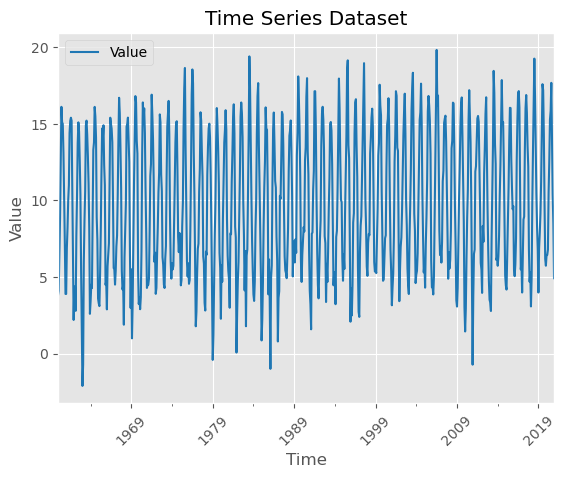

In [17]:
#import the dataset
Tseries = read_table("Monthly_mean_tem.csv", header = 0)

#set the "Date" column as the index
Tseries.set_index("Date", inplace = True)
print(Tseries.head(5))

Tseries.index = pd.to_datetime(Tseries.index)# Convert index to datetime format in other to ensure that its of a date datatype
print(Tseries.head(5))

# Plot the time-series data
Tseries.plot(color='tab:blue')
#plt.plot(data.index, data['value'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation = 45)
plt.title('Time Series Dataset')

plt.show()

# Time series Component

Trend Analysis

7.588106055164618e-19
9.32501930572651
trendline model: Time = 0.00X + 9.33


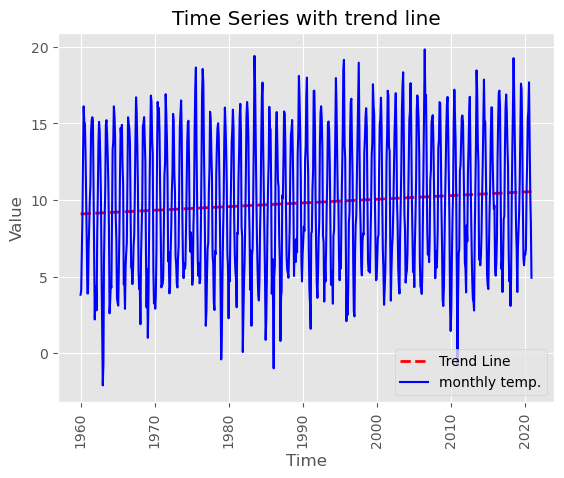

In [18]:
## Fitting trend line on the series using the simple linear regression method

# set the dependent (y) and independent variable (x)
x = pd.to_numeric(Tseries.index).values.reshape(-1, 1)  # Convert datetime index to numeric for regression
y = Tseries['Value']

#Build the model
model = LinearRegression()
model.fit(x,y)

#Get the slope (coefficient) and intercept of the trend line
slope = model.coef_[0]
intercept = model.intercept_
print(slope)
print(intercept)
print(f"trendline model: Time = {slope:.2f}X + {intercept:.2f}")

trend_line = model.predict(x)
plt.plot(Tseries.index, trend_line, color='red', linestyle='--', label='Trend Line', linewidth = 2)

plt.plot(Tseries.index, Tseries['Value'], color = "blue", label = "monthly temp.")
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation = 90)
plt.title('Time Series with trend line')
plt.legend()

plt.show()


 *Decomposition using moving average method with additive model since
    other method includes LOESS (for non-linear model)

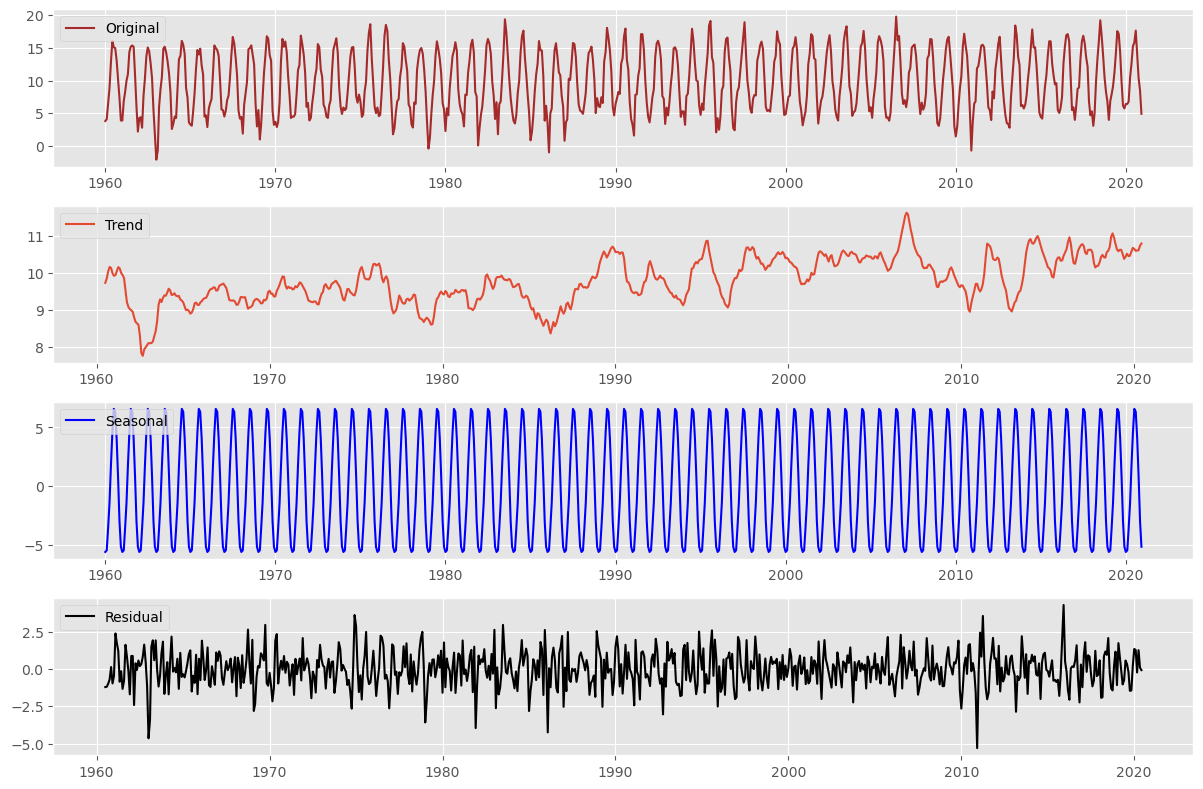

In [19]:
# Decompose the time series into trend, seasonal, and residual components 
# using moving average
result_A = seasonal_decompose(Tseries, model='additive',filt=None, period=None, two_sided=True, extrapolate_trend=0)
result_A
#result_M = seasonal_decompose(Tseries, model = "multiplicative")

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(Tseries, label='Original', color = "brown")
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result_A.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result_A.seasonal, label='Seasonal', color = "blue")
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result_A.resid, label='Residual', color = "black")
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Stationary property of a time series data

In [23]:
#stationary test
result_adf = adfuller(Tseries)
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])

ADF Statistic: -4.985075824189721
p-value: 2.3753063186861977e-05


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'data' is the time series data
plot_acf(Tseries)
plot_pacf(Tseries)
plt.show()